In [1]:
import numpy as np
import pandas as pd
import itertools

In [31]:
df = pd.read_csv('GameGameAmericaResults_.csv')
df = df[df.partyID != "Independent"]
df = df.reset_index(drop=True)
df

,first_1,first_2,first_3,first_4,first_5,first_6,pubs_1,pubs_2,pubs_3,pubs_4,...,third_6,state,partyID,partyID_4_TEXT,relig,relig_10_TEXT,religiosity,educ,MID,ResponseId
0,"strong,encouraging,great,sincere","healthy,important,decent,confident","irresponsible,unfair,destructive,selfish","ignorant,dangerous,hateful,unjust","individualistic,competitive,concrete,profit-dr...","pragmatic,modern,abstract,rural","kind,strong,encouraging,great","important,decent,confident,moral","unacceptable,disgusting,stupid,selfish","ignorant,dangerous,poor,foolish",...,"pragmatic,modern,abstract,purpose-driven",California,Democrat,NaN,Atheists (do not believe God exists),NaN,Not at all1,Bachelor's degree,A1FGKIKJYSL1MI,R_2P69cHWzhVeFjII
1,"strong,sensible,wise,sincere","important,decent,confident,consistent","unacceptable,unfair,dishonest,destructive","ignorant,hateful,unjust,foolish","artistic,competitive,traditional,profit-driven","collectivist,pragmatic,old,purpose-driven","strong,encouraging,great,wise","important,confident,respectful,moral","unacceptable,irresponsible,dishonest,selfish","ignorant,irrational,hateful,foolish",...,"cooperative,abstract,old,purpose-driven",Ohio,Democrat,NaN,Other Christianity (including non-denominational),NaN,Extremely7,Some college or Associate's degree,A3LE25XP3XK5UF,R_PZolkCIbQmobRrr
2,"strong,encouraging,great,sincere","healthy,important,decent,confident","unfair,dishonest,destructive,selfish","ignorant,irrational,unjust,foolish","individualistic,concrete,urban,profit-driven","pragmatic,cooperative,modern,purpose-driven","kind,strong,sensible,great","healthy,decent,truthful,moral","unacceptable,irresponsible,destructive,selfish","ignorant,dangerous,unjust,foolish",...,"pragmatic,cooperative,modern,purpose-driven",California,Democrat,NaN,Agnostic (not sure if God exists),NaN,2,Bachelor's degree,A3T823TYKTZEVO,R_vDfSnkZEnY7Am1X
3,"strong,sensible,wise,happy","healthy,important,decent,confident","stupid,dishonest,destructive,selfish","ignorant,irrational,dangerous,foolish","individualistic,concrete,urban,profit-driven","pragmatic,modern,rural,purpose-driven","strong,sensible,great,wise","important,confident,respectful,consistent","unacceptable,irresponsible,dishonest,destructive","irrational,hateful,unjust,poor",...,"collectivist,modern,old,purpose-driven",California,Democrat,NaN,Buddhism,NaN,2,Bachelor's degree,A224I9B6RFJZEI,R_vMl9fArJieiXsCR
4,"kind,strong,encouraging,great","important,decent,truthful,moral","unacceptable,disgusting,dishonest,destructive","ignorant,dangerous,hateful,unjust","individualistic,competitive,young,profit-driven","pragmatic,cooperative,modern,purpose-driven","strong,sensible,great,wise","healthy,important,decent,confident","unacceptable,disgusting,stupid,destructive","irrational,poor,foolish,awful",...,"pragmatic,cooperative,modern,rural",Connecticut,Democrat,NaN,Agnostic (not sure if God exists),NaN,Not at all1,Some college or Associate's degree,A1YH2I4Y2SYAXJ,R_1k1x61JQ27Xeyjb
5,"strong,encouraging,great,happy","important,decent,confident,consistent","irresponsible,stupid,dishonest,selfish","ignorant,unjust,poor,foolish","competitive,traditional,urban,profit-driven","collectivist,modern,old,purpose-driven","strong,sensible,great,wise","decent,respectful,truthful,moral","unfair,dishonest,destructive,selfish","irrational,dangerous,poor,foolish",...,"collectivist,old,rural,purpose-driven",Virginia,Democrat,NaN,Judaism,NaN,4,Bachelor's degree,A2NUXKCVOD1C9M,R_2DMvBtgjVKpo4NT
6,"strong,sensible,great,wise","decent,consistent,truthful,moral","disgusting,stupid,destructive,selfish","dangerous,unjust,poor,awful","individualistic,artistic,competitive,profit-dr...","pragmatic,modern,abstract,purpose-driven","strong,sensible,great,wise","decent,consistent,truthful,moral","disgusting,unfair,dishonest,selfish","irrational,poor,foolish,awful",...,"collectivist,modern,abstract,purpose-driven",New York,Republican,NaN,Catholicism (including Roman Catholic),NaN,3,Bachelor's degree,A27VBVMMEX9GJB,R

In [32]:
xs = list(df)[0:6]
words = set()
for n in df.iterrows():
    i = n[1]
    for x in xs:
        for w in i[x].split(','):
            words.add(w)
words = list(words)

In [33]:
def get_vecs(row, order='first', words=words):
        
        ur_words = set()
        
        for n in range(1,7):
            
            search = order+"_"+str(n)
            
            for w in row[search].split(','):
                ur_words.add(w)
        
        return np.array([int(word in ur_words) for word in words])
    
def get_percent_agree(i, j, order='first'):
    i = get_vecs(i, order)
    j= get_vecs(j, order)
    n = len(i)
    return (list(i-j).count(0))/n


    
def same_party(i,j):
    return(int(i['partyID']==j['partyID']))

def both_dems(i,j):
    return(int((i['partyID']=='Democrat') & (j['partyID']=="Democrat")))

def both_pubs(i,j):
    return(int((i['partyID']=='Republican') & (j['partyID']=="Republican")))

def both_inds(i,j):
    return(int((i['partyID']=='Independent') & (j['partyID']=="Independent")))

def same_state(i,j):
    return(int(i['state']==j['state']))

def region(s):
    south = {'Alabama', 'Arkansas','Delaware','Florida', 'Georgia','Kentucky','Louisiana','Maryland','Mississippi','North Carolina','Oklahoma',
            'South Carolina','Tennessee','Texas','Virginia','West Virginia'}
    west = {'Arizona', 'California', 'Colorado','Idaho','Montana','Nevada','New Mexico','Oregon','Utah','Washington','Whyoming','Wyoming'}
    east = {'Connecticut','Maine','Massachusetts','New Hampshire','New Jersey','New York','Pennsylvania',
           'Rhode Island','Vermont'}
    midwest = {'Illinois','Indiana','Iowa','Kansas','Michigan','Minnesota','Missouri','Nebraska','North Dakota','Ohio',
              'South Dakota','Wisconsin'}
    other= {'Alaska','Hawaii'}
    foreign = {'Phillipines', 'Vietnam'}
    if s in south:
        return 'south'
    elif s in west:
        return 'west'
    elif s in east:
        return 'east'
    elif s in midwest:
        return 'midwest'
    elif s in other:
        return 'other'
    elif s in foreign:
        return 'foreign'
    else:
        print(s)
        return s

def same_region(i,j):
    a = region(i['state'])
    b = region(j['state'])
    return int(a == b)

def both_south(i,j):
    a = region(i['state'])
    b = region(j['state'])
    return int((a == 'south') & (b == 'south'))

def both_west(i,j):
    a = region(i['state'])
    b = region(j['state'])
    return int((a == 'west') & (b == 'west'))

def both_east(i,j):
    a = region(i['state'])
    b = region(j['state'])
    return int((a == 'east') & (b == 'east'))

def both_midwest(i,j):
    a = region(i['state'])
    b = region(j['state'])
    return int((a == 'midwest') & (b == 'midwest'))

def same_relig(i,j):
    return int(i['relig']==j['relig'])

def map_educ_cont(i):
    ed_dict = {
        "Less than high school": 6,
        "High school diploma or GED": 12,
        "Some college or Associate's degree": 14,
        "Bachelor's degree": 16,
        "Post-graduate education (Master's degree, PhD, MBA, MD, etc.)": 20
    }
    return ed_dict[i]

def map_educ_ord(i):
    ed_dict = {
        "Less than high school": 0,
        "High school diploma or GED": 1,
        "Some college or Associate's degree": 2,
        "Bachelor's degree": 3,
        "Post-graduate education (Master's degree, PhD, MBA, MD, etc.)": 4
    }
    return ed_dict[i]

def mean_educ_cont(i,j):
    ed_i = map_educ_cont(i['educ'])
    ed_j = map_educ_cont(j['educ'])
    return (ed_i+ed_j)/2

def mean_educ_ord(i,j):
    ed_i = map_educ_ord(i['educ'])
    ed_j = map_educ_ord(j['educ'])
    return (ed_i+ed_j)/2

def diff_educ_cont(i,j):
    ed_i = map_educ_cont(i['educ'])
    ed_j = map_educ_cont(j['educ'])
    return max(ed_i,ed_j)-min(ed_i,ed_j)

def diff_educ_ord(i,j):
    ed_i = map_educ_ord(i['educ'])
    ed_j = map_educ_ord(j['educ'])
    return max(ed_i,ed_j)-min(ed_i,ed_j)

In [34]:
data = []
cols = ['i', 'j', 'same_party', 'both_dems', 'both_pubs', 'both_ind', 
        'same_state', 'same_region', 'both_south', 'both_west', 'both_east', 'both_midwest',
        'same_relig',
        'mean_educ_cont', 'mean_educ_ord', 'diff_educ_cont', 'diff_educ_ord', 
        'agree_1', 'agree_2', 'agree_3', 'agree_4']

for i, j in itertools.combinations(df.iterrows(),2):
            row = []
            row.append(i[0])
            row.append(j[0])
            row.append(same_party(i[1],j[1]))
            row.append(both_dems(i[1],j[1]))
            row.append(both_pubs(i[1],j[1]))
            row.append(both_inds(i[1],j[1]))
            row.append(same_state(i[1],j[1]))
            row.append(same_region(i[1],j[1]))
            row.append(both_south(i[1],j[1]))
            row.append(both_west(i[1],j[1]))
            row.append(both_east(i[1],j[1]))
            row.append(both_midwest(i[1],j[1]))
            row.append(same_relig(i[1],j[1]))
            row.append(mean_educ_cont(i[1],j[1]))
            row.append(mean_educ_ord(i[1],j[1]))
            row.append(diff_educ_cont(i[1],j[1]))
            row.append(diff_educ_ord(i[1],j[1]))
            row.append(get_percent_agree(i[1],j[1]))
            row.append(get_percent_agree(i[1],j[1],order='pubs'))
            row.append(get_percent_agree(i[1],j[1],order='dems'))
            row.append(get_percent_agree(i[1],j[1],order='third'))
            data.append(row)
            
data_df = pd.DataFrame(data, columns=cols)

data_df.to_csv('GameGameAmerica_dyad_data.csv')

In [35]:
data_df

,i,j,same_party,both_dems,both_pubs,both_ind,same_state,same_region,both_south,both_west,...,both_midwest,same_relig,mean_educ_cont,mean_educ_ord,diff_educ_cont,diff_educ_ord,agree_1,agree_2,agree_3,agree_4
0,0,1,1,1,0,0,0,0,0,0,...,0,0,15.0,2.5,2,1,0.541667,0.625000,0.583333,0.541667
1,0,2,1,1,0,0,1,1,0,1,...,0,0,16.0,3.0,0,0,0.750000,0.625000,0.750000,0.541667
2,0,3,1,1,0,0,1,1,0,1,...,0,0,16.0,3.0,0,0,0.625000,0.458333,0.666667,0.708333
3,0,4,1,1,0,0,0,0,0,0,...,0,0,15.0,2.5,2,1,0.625000,0.625000,0.625000,0.666667
4,0,5,1,1,0,0,0,0,0,0,...,0,0,16.0,3.0,0,0,0.541667,0.583333,0.583333,0.583333
5,0,6,0,0,0,0,0,0,0,0,...,0,0,16.0,3.0,0,0,0.541667,0.500000,0.583333,0.583333
6,0,7,1,1,0,0,0,0,0,0,...,0,0,16.0,3.0,0,0,0.458333,0.458333,0.500000,0.583333
7,0,8,0,0,0,0,0,0,0,0,...,0,0,14.0,2.0,4,2,0.625000,0.666667,0.625000,0.541667
8,0,9,0,0,0,0,0,0,0,0,...,0,0,16.0,3.0,0,0,0.625000,0.541667,0.416667,0.541667
9,0,10,1,1,0,0,0,1,0,1,...,0,0,15.0,2.5,2,1,0.750000,0.541667,0.583333,0.708333


In [36]:
for n in df.iterrows():
    i = n[1]
    if i['partyID'] == "Independent":
        print(n[0])

In [37]:
reps = df.loc[df['partyID'] == 'Republican']
dems = df.loc[df['partyID'] == 'Democrat']

In [38]:
import scipy.spatial.distance as dist

n = int(df.shape[0])

A_first = np.zeros((n,n))
A_dems = np.zeros((n,n))
A_pubs = np.zeros((n,n))
A_third = np.zeros((n,n))

party = {}
first = {}
dems = {}
pubs = {}
third = {}

for index, row in df.iterrows():
    party[index] = row['partyID']
    first[index] = get_vecs(row)
    dems[index] = get_vecs(row, 'dems')
    pubs[index] = get_vecs(row, 'pubs')
    third[index] = get_vecs(row, 'third')
    
for i in range(n):
    for j in range(n):
        if i == j:
            A_first[i,j] = 1
            A_dems[i,j] = 1
            A_pubs[i,j] = 1
            A_third[i,j] = 1
        else:
            A_first[i,j] = A_first[j,i] = dist.cosine(first[i],first[j])
            A_dems[i,j] = A_dems[j,i] = dist.cosine(dems[i],dems[j])
            A_pubs[i,j] = A_pubs[j,i] = dist.cosine(pubs[i],pubs[j])
            A_third[i,j] = A_third[j,i] = dist.cosine(third[i],third[j])
            

In [39]:
import scipy
from scipy.sparse.csgraph import laplacian
from scipy.stats import pearsonr as cor

party_vec = []

for i in party:
    if party[i] == 'Democrat':
        party_vec.append(1)
    else:
        party_vec.append(0)

In [40]:
f_first = np.linalg.eig(laplacian(A_first, normed=True))[1][:,1]
        
f_first = [float(x) for x in f_first]

print(scipy.stats.pearsonr(f_first,party_vec))

bin_f_first = []

for i in f_first:
    if i < 0:
        bin_f_first.append(0)
    else:
        bin_f_first.append(1)
        
print(cor(bin_f_first,party_vec))

(-0.27446906911506935, 6.098559085876178e-08)
(-0.27723816392966966, 4.430798317652471e-08)


C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
f_dems = np.linalg.eig(laplacian(A_dems, normed=True))[1][:,1]
        
f_dems = [float(x) for x in f_dems]

print(scipy.stats.pearsonr(f_dems,party_vec))

bin_f_dems = []

for i in f_dems:
    if i < 0:
        bin_f_dems.append(0)
    else:
        bin_f_dems.append(1)
        
print(cor(bin_f_dems,party_vec))

(-0.12552181685139732, 0.014738064993047242)
(-0.09702756479205604, 0.05981952608384869)


C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
f_pubs = np.linalg.eig(laplacian(A_pubs, normed=True))[1][:,1]
        
f_pubs = [float(x) for x in f_pubs]

print(scipy.stats.pearsonr(f_pubs,party_vec))

bin_f_pubs = []

for i in f_pubs:
    if i < 0:
        bin_f_pubs.append(0)
    else:
        bin_f_pubs.append(1)
        
print(cor(bin_f_pubs,party_vec))

(-0.10151512086723063, 0.048882787959154066)
(-0.15107363937525994, 0.003277111805341079)


C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
f_third = np.linalg.eig(laplacian(A_third, normed=True))[1][:,1]
        
f_third = [float(x) for x in f_third]

print(scipy.stats.pearsonr(f_third,party_vec))

bin_f_third = []

for i in f_third:
    if i < 0:
        bin_f_third.append(0)
    else:
        bin_f_third.append(1)
        
print(cor(bin_f_third,party_vec))

(-0.05215603565068575, 0.3124896599505083)
(-0.0036943383404662356, 0.9430052995318494)


C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
data_first = []
cols_first = words + ['party']

for i in df.iterrows():
    row_first = []
    row_first += list(get_vecs(i[1]))
    row_first.append(i[1]['partyID'])
    data_first.append(row_first)
    
ind_A_first = pd.DataFrame(data_first, columns=cols_first)

X = [int(i=='Democrat') for i in ind_A_first['party']]

first_coefs = []

for i in ind_A_first:
    if i != 'party':
        r = cor(ind_A_first[i],X)
        first_coefs.append([i, r[0],r[1]])

cols = ['term','r','p']

pd.DataFrame(first_coefs, columns=cols).to_csv('GGA_first_coefs.csv')

In [16]:
data_pub = []
cols_pub = words + ['party']

for i in df.iterrows():
    row_pub = []
    row_pub += list(get_vecs(i[1],'pubs'))
    row_pub.append(i[1]['partyID'])
    data_pub.append(row_pub)
    
ind_A_pub = pd.DataFrame(data_pub, columns=cols_pub)

X = [int(i=='Democrat') for i in ind_A_pub['party']]

pub_coefs = []

for i in ind_A_pub:
    if i != 'party':
        r = cor(ind_A_pub[i],X)
        pub_coefs.append([i, r[0],r[1]])

cols = ['term','r','p']

pd.DataFrame(pub_coefs, columns=cols).to_csv('GGA_pub_coefs.csv')

In [18]:
data_dem = []
cols_dem = words + ['party']

for i in df.iterrows():
    row_dem = []
    row_dem += list(get_vecs(i[1],'dems'))
    row_dem.append(i[1]['partyID'])
    data_dem.append(row_dem)
    
ind_A_dem = pd.DataFrame(data_dem, columns=cols_dem)

X = [int(i=='Democrat') for i in ind_A_dem['party']]

dem_coefs = []

for i in ind_A_dem:
    if i != 'party':
        r = cor(ind_A_dem[i],X)
        dem_coefs.append([i, r[0],r[1]])

cols = ['term','r','p']

pd.DataFrame(dem_coefs, columns=cols).to_csv('GGA_dem_coefs.csv')

In [17]:
data_third = []
cols_third = words + ['party']

for i in df.iterrows():
    row_third = []
    row_third += list(get_vecs(i[1],'third'))
    row_third.append(i[1]['partyID'])
    data_third.append(row_third)
    
ind_A_third = pd.DataFrame(data_third, columns=cols_third)

X = [int(i=='Democrat') for i in ind_A_third['party']]

third_coefs = []

for i in ind_A_third:
    if i != 'party':
        r = cor(ind_A_third[i],X)
        third_coefs.append([i, r[0],r[1]])

cols = ['term','r','p']

pd.DataFrame(third_coefs, columns=cols).to_csv('GGA_third_coefs.csv')

In [55]:
first_response = []
nu_party_vec = []

for index, row in df.iterrows():
    first_response.append(get_vecs(row))
    if row['partyID'] == 'Democrat':
        nu_party_vec.append('b')
    elif row['partyID'] == 'Independent':
        nu_party_vec.append('g')
    elif row['partyID'] == 'Republican':
        nu_party_vec.append('r')
    else:
        nu_party_vec.append('m')

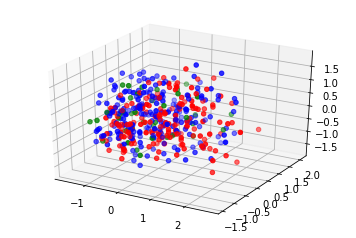

In [66]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca.fit(first_response)
first_space = pca.transform(first_response)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(first_space[:,0], first_space[:,1], first_space[:,2], c=nu_party_vec)
plt.show()


In [62]:
plt.show()